#  Import Library

In [14]:
%matplotlib inline

In [15]:
print(__doc__)

Automatically created module for IPython interactive environment


In [16]:
import TeraHertz_Dataset
import numpy as np
import pandas as pd
import keras.utils as utils
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA


In [17]:
Input, Target = TeraHertz_Dataset.load_dataset()

In [18]:
print("Shape of Input: ", Input.shape)
print("Shape of Target: ", Target.shape)

Shape of Input:  (4200, 5074)
Shape of Target:  (4200,)


In [19]:
MinMaxScaler = preprocessing.MinMaxScaler()
X_scaled = MinMaxScaler.fit_transform(Input)

In [20]:
# keep the first two  principal components of the data
pca = PCA(n_components=2)
# fit  PCA model to the TeraHertz data
pca.fit(X_scaled)
# tarnsform data onto the first two principal components
X_pca = pca.transform(X_scaled)

In [21]:
print("Original data shape: {}".format(str(X_scaled.shape)))
print("Reduced data shape: {}".format(str(X_pca.shape)))

Original data shape: (4200, 5074)
Reduced data shape: (4200, 2)


In [22]:
import mglearn
mglearn.__version__

'0.1.6'

In [23]:
# plot first vs. second principal components, colored by class
def show_pca_plot(pca_data, target):
    plt.figure(figsize=(25, 25))
    mglearn.discrete_scatter(pca_data[:, 0], pca_data[:, 1], target)
    plt.legend(["E.Coli", "Yeast"], loc="best", prop={'size': 20})
    plt.gca().set_aspect("equal")
    plt.xlabel("First principal component")
    plt.ylabel("Second principal component")
    plt.show()
    plt.savefig('pca.png')

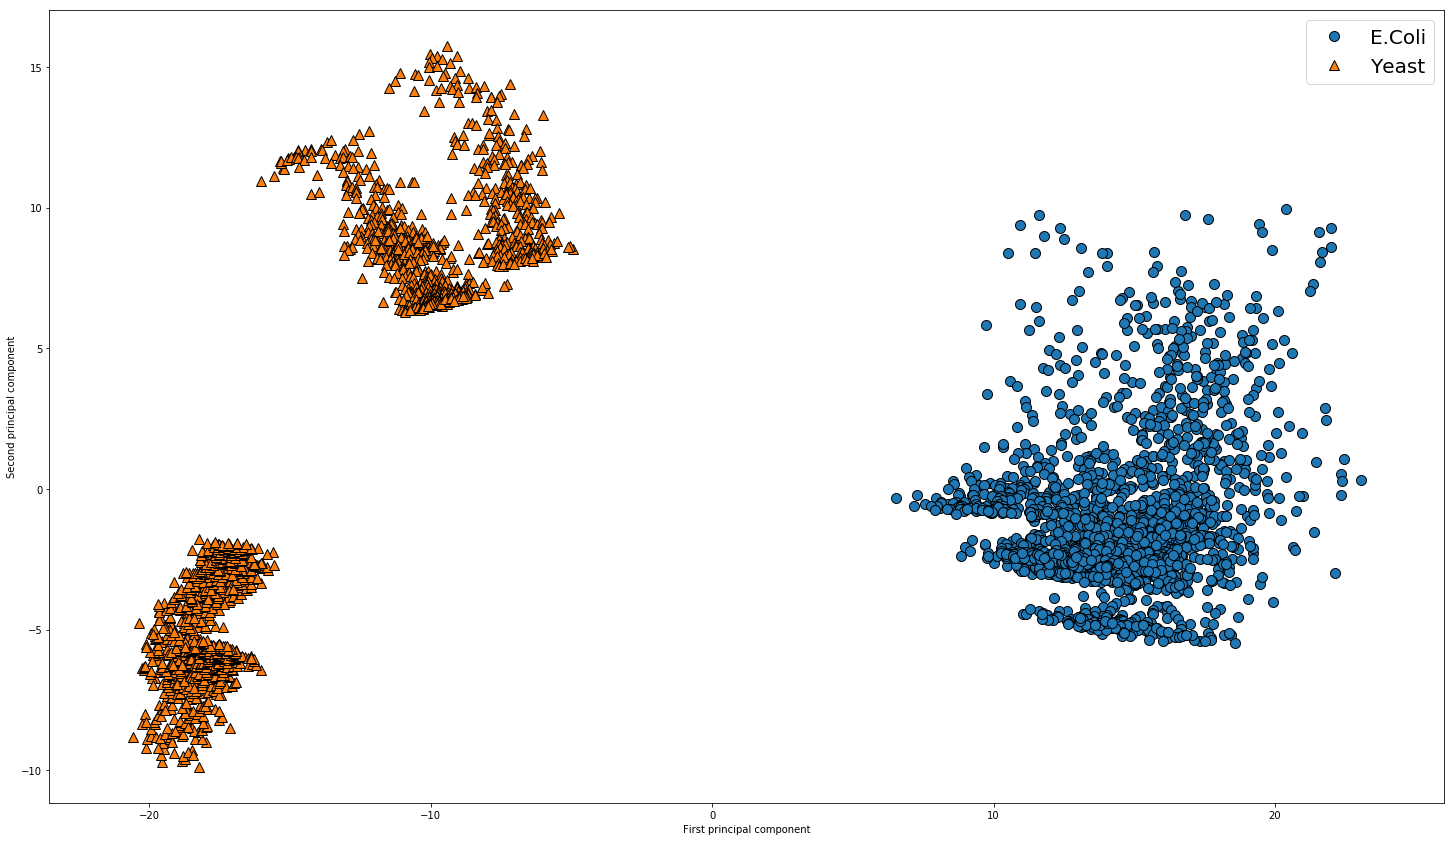

In [24]:
show_pca_plot(X_pca, Target)

In [25]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, Target, 
                                                                    test_size=.1, random_state=27)

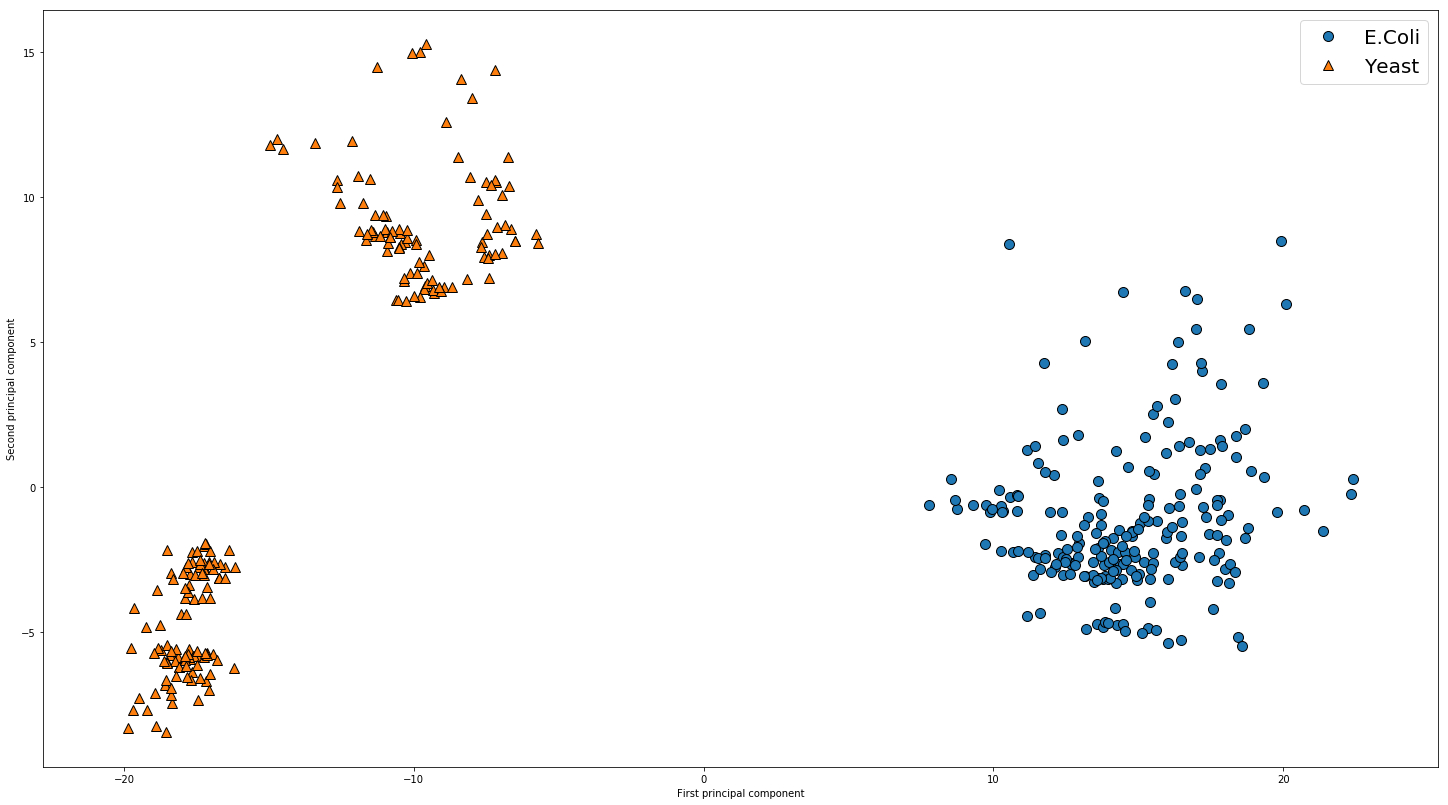

In [26]:
show_pca_plot(X_pca_test, y_pca_test)